In [14]:
# import statements
datapath = 'datasets/'
from autograd import numpy as np

In [15]:
# import automatic differentiator to compute gradient module
from autograd import grad 

# gradient descent function 
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

In [16]:
# the import statement for matplotlib
import matplotlib.pyplot as plt

# cost function history plotter
def plot_cost_histories(cost_histories,labels):
    # create figure
    plt.figure()
    
    # loop over cost histories and plot each one
    for j in range(len(cost_histories)):
        history = cost_histories[j]
        label = labels[j]
        plt.plot(history,label = label)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

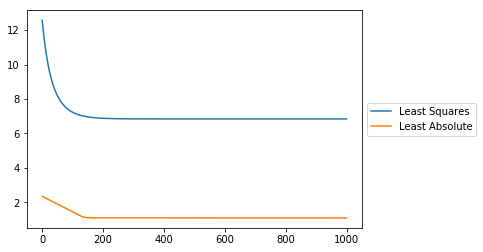

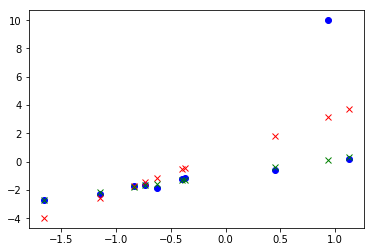

In [40]:
# load in dataset
csvname = datapath + 'regression_outliers.csv'
data = np.loadtxt(csvname,delimiter = ',')

# get input and output of dataset
x = data[:-1,:]
y = data[-1:,:] 
g_ls = least_squares; 
g_abs = least_abs
w = 0.1*np.random.randn(2,1); max_its = 1000; alpha_choice = 10**(-2);
weight_history_L, cost_history_L = gradient_descent(g_ls,alpha_choice,max_its,w)
weight_history_A, cost_history_A = gradient_descent(g_abs,alpha_choice,max_its,w)
plot_cost_histories([cost_history_L,cost_history_A],labels = ["Least Squares","Least Absolute"])
yfit_L = model(x,weight_history_L[-1])
yfit_A = model(x,weight_history_A[-1])
plt.figure()
plt.plot(x,y,'bo')
plt.plot(x,yfit_L,'rx')
plt.plot(x,yfit_A,'gx')
plt.show()


In [18]:
def least_squares(w):
    cost = np.sum((model(x,w) - y)**2)
    return cost/float(np.size(y))

In [19]:
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T


In [20]:
def least_abs(w):
    cost = np.sum(abs(model(x,w) - y))
    return cost/float(y.size)